# AMAZON FINE FOOD REVIEW ANALYSIS

# OBJECTIVE

Given a review , determine whether the review is positive or not.
  Positive when review rating is 4 or 5.
  Negative when review rating is 1 or 3.
  And the review rating 3,We consider it as nuetral and in our problem we won't consider that.

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve,auc

In [2]:
data=pd.read_csv("C:/Users/tapas/Documents/machine learninng/datasets/amazon fine food reviews/Reviews.csv")
data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [33]:
data.dropna(inplace=True)
data[data['Score'] != 3]
data['Positivity'] = np.where(data['Score'] > 3, 1, 0)
data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Positivity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


In [ ]:
data

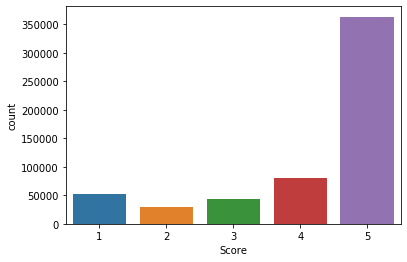

In [106]:
sns.countplot(data['Score']) 
plt.show()

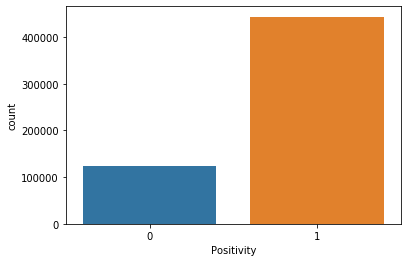

In [108]:
sns.countplot(data['Positivity']) 
plt.show()

# TSNE with bag of words

In [109]:
positive_points = data[data['Positivity'] == 1].sample(n=3000)
negative_points = data[data['Positivity'] == 0].sample(n=3000)
total_points = pd.concat([positive_points, negative_points])

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
vect=CountVectorizer()
std_scaler = StandardScaler(with_mean=False)

In [112]:
sample_points = total_points['Text']

In [113]:
sample_points = count_vect.fit_transform(sample_points)
sample_points = std_scaler.fit_transform(sample_points)
sample_points = sample_points.todense()

In [115]:
labels = total_points['Positivity']

In [116]:
print(sample_points.shape, labels.shape)

(6000, 16384) (6000,)


c:\users\tapas\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


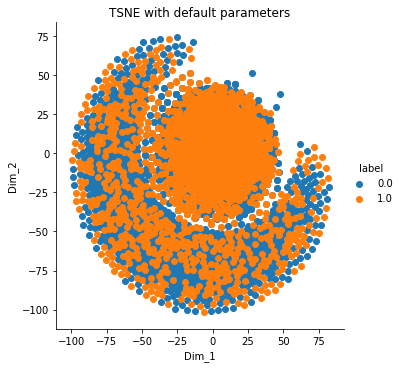

In [118]:
from sklearn.manifold import TSNE

tsne_data = sample_points
tsne_labels = labels

# Initializing with most explained variance
model = TSNE(n_components=2, random_state=15)

# Fitting model
tsne_data = model.fit_transform(tsne_data)

# Adding labels to the data point
tsne_data = np.vstack((tsne_data.T, tsne_labels)).T

# Creating data frame
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))

# Plotting graph for class labels
sns.FacetGrid(tsne_df, hue='label', size=5).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("TSNE with default parameters")
plt.xlabel("Dim_1")
plt.ylabel("Dim_2")
plt.show()

# TSNE WITH TFIDF

In [122]:
vect_1=TfidfVectorizer()
std_scaler_1 = StandardScaler(with_mean=False)

In [123]:
sample_points_1 = total_points['Text']

In [125]:
sample_points_1 = vect_1.fit_transform(sample_points_1)
sample_points_1 = std_scaler_1.fit_transform(sample_points_1)
sample_points_1 = sample_points_1.todense()

In [126]:
labels = total_points['Positivity']

c:\users\tapas\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\tapas\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:98: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


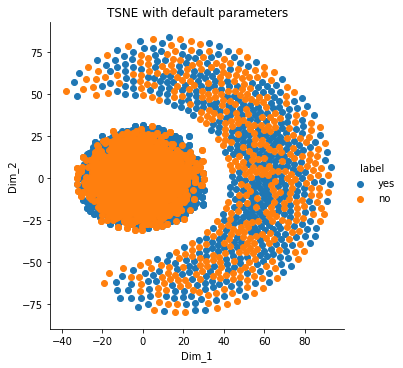

In [127]:
from sklearn.manifold import TSNE

tsne_data_1 = sample_points_1
tsne_labels = labels

# Initializing with most explained variance
model = TSNE(n_components=2, random_state=15)

# Fitting model
tsne_data_1 = model.fit_transform(tsne_data_1)

# Adding labels to the data point
tsne_data_1 = np.vstack((tsne_data_1.T, tsne_labels)).T

# Creating data frame
tsne_df = pd.DataFrame(data=tsne_data_1, columns=('Dim_1', 'Dim_2', 'label'))

# Plotting graph for class labels
sns.FacetGrid(tsne_df, hue='label', size=5).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(labels=['yes','no'])
plt.title("TSNE with default parameters")
plt.xlabel("Dim_1")
plt.ylabel("Dim_2")
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data['Text'], data['Positivity'],test_size=0.20, random_state = 42)
X_train.shape

(454728,)

# BAG OF WORDS

In [46]:
count_vect = CountVectorizer()
final_counts=count_vect.fit_transform(X_train)
final_counts.shape

(454728, 109196)

In [54]:
len(count_vect.get_feature_names())

109196

In [36]:
X_train_vectorized = count_vect.transform(X_train)
X_train_vectorized

<454728x109196 sparse matrix of type '<class 'numpy.int64'>'
	with 24521521 stored elements in Compressed Sparse Row format>

In [37]:
print(count_vect.get_feature_names()[::2000])
len(count_vect.get_feature_names())

['00', '240', '774', 'aerate', 'andyson', 'atora', 'b000gevgxa', 'b001epqebe', 'b00423uvbo', 'barside', 'bladderworts', 'bronzy', 'car', 'chese', 'coconutish', 'contrary', 'cumarin', 'demonstrators', 'dispirito', 'earthship', 'equilivent', 'falls', 'fluctuated', 'gack', 'gooping', 'handiling', 'homeschooling', 'inasmch', 'ishopindian', 'key', 'legend', 'lupus', 'mccabe', 'mitad', 'nagel', 'nurses', 'oscars', 'patsys', 'pinzimonio', 'prell', 'pyjamas', 'redneck', 'rg', 'sandwhiches', 'servered', 'slathers', 'speedwalking', 'streched', 'swisa', 'themselves', 'transparent', 'undrunk', 'verarity', 'werenot', 'xylan']


109196

In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, Y_train)

c:\users\tapas\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
from sklearn.metrics import roc_auc_score
predictions = model.predict(count_vect.transform(X_test))
print('AUC: ', roc_auc_score(Y_test, predictions))

AUC:  0.819587797615879


# BIGRAM

In [57]:
count_vect_1 = CountVectorizer(ngram_range=(1,2))
final_counts_1=count_vect_1.fit_transform(X_train)

In [58]:
final_counts_1.shape

(454728, 2741566)

In [59]:
len(count_vect_1.get_feature_names())

2741566

In [61]:
print(count_vect_1.get_feature_names()[::2000])

['00', '09 year', '100 out', '11 year', '125 pound', '149 49', '160lb', '18oz bag', '1st carried', '200mg now', '22 cases', '25 paying', '2g more', '30mins when', '360 iron', '40 reduced', '48 packages', '5000 my', '5months', '686377 so', '76 now', '87 moles', '97 20', 'abbondanza rather', 'about duplicates', 'about subscription', 'absolutely low', 'acceptable have', 'accurate placed', 'acidity mellow', 'active day', 'actually couple', 'ad instructed', 'add triple', 'addicted these', 'additional cherry', 'adequate fix', 'adore receiving', 'advertised over', 'affected that', 'after cant', 'after vaccinations', 'again bravo', 'agave igor', 'ago know', 'aide indicator', 'aka salt', 'ale gingerbread', 'all available', 'all measures', 'allegedly adds', 'allowed junk', 'almost cracker', 'alone try', 'alround the', 'also mighty', 'alternate healthy', 'altogether create', 'always pushing', 'am impulse', 'amazing apple', 'amazon enthusiasm', 'ambivalent', 'among any', 'an addicted', 'an irratio

In [62]:
X_train_vectorized_1 = count_vect_1.transform(X_train)
X_train_vectorized_1

<454728x2741566 sparse matrix of type '<class 'numpy.int64'>'
	with 57324305 stored elements in Compressed Sparse Row format>

In [63]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()
model_1.fit(X_train_vectorized_1, Y_train)

c:\users\tapas\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
from sklearn.metrics import roc_auc_score
predictions = model_1.predict(count_vect_1.transform(X_test))
print('AUC: ', roc_auc_score(Y_test, predictions))

AUC:  0.8991346890822678


# TFIDF

In [71]:
tf_idf_vect = TfidfVectorizer()
final_tf_idf=tf_idf_vect.fit_transform(X_train)

In [72]:
final_tf_idf.shape

(454728, 109196)

In [73]:
X_train_vectorized_2 = tf_idf_vect.transform(X_train)
X_train_vectorized_2

<454728x109196 sparse matrix of type '<class 'numpy.float64'>'
	with 24521521 stored elements in Compressed Sparse Row format>

In [74]:
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression()
model_2.fit(X_train_vectorized_2, Y_train)

c:\users\tapas\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
from sklearn.metrics import roc_auc_score
predictions = model_2.predict(tf_idf_vect.transform(X_test))
print('AUC: ', roc_auc_score(Y_test, predictions))

AUC:  0.8338351323376996


In [82]:
features = tf_idf_vect.get_feature_names()

In [83]:
def top_tfidf_feats(row,features,top_n=25):
    topn_ids=np.argsort(row)[::-1][:top_n]
    top_feats=[(features[i],row[i]) for i in topn_ids]
    df=pd.DataFrame(top_feats)
    df.columns=['feature','tfidf']
    return df


top_tfidf = top_tfidf_feats(final_tf_idf[1,:].toarray()[0],features,25)

In [84]:
top_tfidf

,feature,tfidf
0,cubes,0.346235
1,decaf,0.337188
2,ice,0.314804
3,reusable,0.287687
4,it,0.120850
5,sometimes,0.120455
6,href,0.119667
7,gp,0.119349
8,http,0.118841
9,www,0.118631


# TFIDF WITH BIGRAM

In [98]:
tf_idf_vect_1 = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf_1=tf_idf_vect_1.fit_transform(X_train)

In [99]:
final_tf_idf_1.shape

(454728, 2741566)

In [100]:
X_train_vectorized_3 = tf_idf_vect_1.transform(X_train)
X_train_vectorized_3

<454728x2741566 sparse matrix of type '<class 'numpy.float64'>'
	with 57324305 stored elements in Compressed Sparse Row format>

In [101]:
from sklearn.linear_model import LogisticRegression
model_3 = LogisticRegression()
model_3.fit(X_train_vectorized_3, Y_train)

c:\users\tapas\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
from sklearn.metrics import roc_auc_score
predictions = model_3.predict(tf_idf_vect_1.transform(X_test))
print('AUC: ', roc_auc_score(Y_test, predictions))

AUC:  0.8798682853927906


In [103]:
features_1 = tf_idf_vect_1.get_feature_names()

In [104]:
top_tfidf_1 = top_tfidf_feats(final_tf_idf_1[1,:].toarray()[0],features_1,25)
top_tfidf_1

,feature,tfidf
0,reusable ice,0.232150
1,ice cubes,0.211132
2,cubes,0.184344
3,decaf,0.179527
4,ice,0.167609
5,reusable,0.153172
6,ice tm,0.081873
7,tm reusable,0.081873
8,product b001c54dvo,0.081873
9,b000uvk9ci madhava,0.081873
